In [1]:
# import sys
# !{sys.executable} -m pip install librosa
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install scikeras

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = np.load('X_data_mfcc_piano_violin_2.npy')
labels = np.load('y_data_mfcc_piano_violin_2.npy')

In [4]:
data.shape

(1301, 259, 20)

In [5]:
labels.shape

(1301,)

In [6]:
data

array([[[-3.52797577e+02,  1.42670258e+02,  1.27295761e+01, ...,
          1.33986120e+01,  1.23570833e+01,  6.84048367e+00],
        [-3.92220947e+02,  1.66134277e+02,  1.26726532e+01, ...,
          1.09783344e+01,  1.26995583e+01,  1.03413906e+01],
        [-4.66698273e+02,  2.15428680e+02,  1.02498589e+01, ...,
          8.54321480e+00,  1.14468098e+01,  1.40046310e+01],
        ...,
        [-4.03711151e+02,  2.45181183e+02, -7.75655806e-01, ...,
          7.24294543e-01,  2.15211058e+00, -3.50395465e+00],
        [-3.88863068e+02,  2.37482208e+02,  5.13718510e+00, ...,
         -1.05156720e+00, -3.26814604e+00, -3.41808701e+00],
        [-3.38140930e+02,  1.83691772e+02,  2.11419106e+01, ...,
          2.93242097e+00,  1.07606697e+00, -6.19458616e-01]],

       [[-4.16149597e+02,  2.01254181e+02, -1.04079361e+01, ...,
          5.51784992e+00,  3.48852539e+00, -2.11655736e+00],
        [-3.82570221e+02,  2.25652985e+02, -1.72884750e+01, ...,
          2.65123129e+00, -7.50893474e

In [7]:
labels

array(['piano', 'piano', 'piano', ..., 'violin', 'violin', 'violin'],
      dtype='<U6')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(1040, 259, 20)

In [10]:
y_train.shape

(1040,)

In [11]:
X_test.shape

(261, 259, 20)

In [12]:
y_train

array(['piano', 'piano', 'violin', ..., 'violin', 'violin', 'violin'],
      dtype='<U6')

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_enc = label_encoder.fit(y_train)

In [14]:
label_encoder.classes_

array(['piano', 'violin'], dtype='<U6')

In [15]:
y_train = label_encoder.transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [16]:
y_train

array([0, 0, 1, ..., 1, 1, 1])

In [17]:
y_train

array([0, 0, 1, ..., 1, 1, 1])

In [18]:
label_encoder.classes_

array(['piano', 'violin'], dtype='<U6')

In [19]:
num_labels = len(label_encoder.classes_)
num_labels

2

In [20]:
X_train[0]

array([[-183.18031   ,  134.37772   ,  -33.762947  , ...,   -3.488148  ,
           3.953074  ,    2.8168993 ],
       [-200.07906   ,  165.52097   ,  -37.072487  , ...,   -5.676568  ,
           2.0394049 ,   -0.852144  ],
       [-256.87543   ,  208.83087   ,  -70.55301   , ...,   -8.706143  ,
           2.8116875 ,  -11.540628  ],
       ...,
       [-236.33028   ,  266.11682   ,  -45.044266  , ...,   -2.5806098 ,
          -2.9950724 ,   -9.303976  ],
       [-216.21866   ,  232.78784   ,  -22.40919   , ...,    2.9288278 ,
           1.2379299 ,   -7.791     ],
       [-178.8135    ,  174.98953   ,    8.030809  , ...,    3.3454247 ,
          -0.63793397,   -7.3339424 ]], dtype=float32)

In [21]:
X_train.shape

(1040, 259, 20)

In [22]:
img_height, img_width = X_train.shape[1], X_train.shape[2]
X_train_img = X_train.reshape(X_train.shape[0], img_height, img_width, 1)
X_test_img = X_test.reshape(X_test.shape[0], img_height, img_width, 1)

In [23]:
X_train_img.shape

(1040, 259, 20, 1)

In [24]:
y_train

array([0, 0, 1, ..., 1, 1, 1])

In [25]:
y_train.shape

(1040,)

In [26]:
# models

In [27]:
from datetime import datetime 

In [28]:
from keras import backend as keras_backend
from keras.models import Sequential, load_model
from keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.regularizers import l2

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Dropout
from scikeras.wrappers import KerasClassifier

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [32]:
display_labels = label_encoder.classes_
display_labels

array(['piano', 'violin'], dtype='<U6')

In [33]:
# cnn

In [34]:
# !pip install hyperopt --user

In [56]:
def getModel():
    model = Sequential()
    model.add(Input(shape=(img_height, img_width, 1)))
    model.add(Conv2D(32, 3, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [57]:
num_epochs = 20
num_batch_size = 32

model_cnn = KerasClassifier(model=getModel, verbose=1, optimizer='adam', loss='sparse_categorical_crossentropy',epochs=num_epochs, batch_size=num_batch_size, metrics=['accuracy'])

In [58]:
model_cnn

KerasClassifier(
	model=<function getModel at 0x16e446af0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=sparse_categorical_crossentropy
	metrics=['accuracy']
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

In [59]:
start = datetime.now()

final_model_cnn = model_cnn.fit(X_train_img, y_train, validation_data=(X_test_img, y_test), verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20
33/33 [==============================] - 6s 110ms/step - loss: 0.8543 - accuracy: 0.7327 - val_loss: 0.9446 - val_accuracy: 0.6973
Epoch 2/20
33/33 [==============================] - 1s 25ms/step - loss: 0.4040 - accuracy: 0.8356 - val_loss: 1.2116 - val_accuracy: 0.6245
Epoch 3/20
33/33 [==============================] - 1s 24ms/step - loss: 0.2845 - accuracy: 0.8779 - val_loss: 0.5165 - val_accuracy: 0.7395
Epoch 4/20
33/33 [==============================] - 1s 22ms/step - loss: 0.2580 - accuracy: 0.9048 - val_loss: 0.4399 - val_accuracy: 0.7854
Epoch 5/20
33/33 [==============================] - 1s 21ms/step - loss: 0.2355 - accuracy: 0.9096 - val_loss: 0.3497 - val_accuracy: 0.8238
Epoch 6/20
33/33 [==============================] - 1s 22ms/step - loss: 0.1542 - accuracy: 0.9356 - val_loss: 0.3048 - val_accuracy: 0.8889
Epoch 7/20
33/33 [==============================] - 1s 22ms/step - loss: 0.1431 - accuracy: 0.9452 - val_loss: 0.3018 - val_accuracy: 0.8851
Epoch 8/20
3

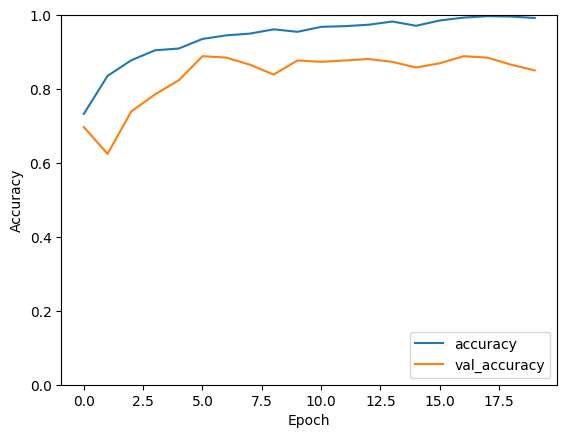

In [60]:
plt.plot(final_model_cnn.history_['accuracy'], label='accuracy')
plt.plot(final_model_cnn.history_['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [61]:
# train

In [62]:
from sklearn.model_selection import cross_val_score

cv_score_cnn_train = cross_val_score(final_model_cnn, X_train_img, y_train, cv=5, scoring="accuracy", verbose=0)
cv_score_cnn_train

Epoch 1/20
26/26 [==============================] - 1s 22ms/step - loss: 0.8027 - accuracy: 0.7356
Epoch 2/20
26/26 [==============================] - 0s 17ms/step - loss: 0.3795 - accuracy: 0.8558
Epoch 3/20
26/26 [==============================] - 0s 18ms/step - loss: 0.2884 - accuracy: 0.8762
Epoch 4/20
26/26 [==============================] - 0s 18ms/step - loss: 0.2798 - accuracy: 0.8882
Epoch 5/20
26/26 [==============================] - 0s 18ms/step - loss: 0.1989 - accuracy: 0.9171
Epoch 6/20
26/26 [==============================] - 0s 17ms/step - loss: 0.2009 - accuracy: 0.9147
Epoch 7/20
26/26 [==============================] - 0s 17ms/step - loss: 0.1406 - accuracy: 0.9387
Epoch 8/20
26/26 [==============================] - 0s 17ms/step - loss: 0.1707 - accuracy: 0.9255
Epoch 9/20
26/26 [==============================] - 0s 16ms/step - loss: 0.0932 - accuracy: 0.9724
Epoch 10/20
26/26 [==============================] - 0s 18ms/step - loss: 0.0743 - accuracy: 0.9736
Epoch 11/

array([0.84134615, 0.84134615, 0.82692308, 0.86057692, 0.87019231])

In [63]:
print('Accuracy CNN Train:', cv_score_cnn_train.mean())

Accuracy CNN Train: 0.848076923076923


Epoch 1/20
26/26 [==============================] - 2s 23ms/step - loss: 0.8418 - accuracy: 0.7308
Epoch 2/20
26/26 [==============================] - 0s 19ms/step - loss: 0.3881 - accuracy: 0.8401
Epoch 3/20
26/26 [==============================] - 0s 17ms/step - loss: 0.3681 - accuracy: 0.8534
Epoch 4/20
26/26 [==============================] - 0s 17ms/step - loss: 0.2896 - accuracy: 0.8774
Epoch 5/20
26/26 [==============================] - 0s 17ms/step - loss: 0.2663 - accuracy: 0.8894
Epoch 6/20
26/26 [==============================] - 0s 17ms/step - loss: 0.2148 - accuracy: 0.9183
Epoch 7/20
26/26 [==============================] - 0s 17ms/step - loss: 0.1711 - accuracy: 0.9291
Epoch 8/20
26/26 [==============================] - 1s 20ms/step - loss: 0.1113 - accuracy: 0.9603
Epoch 9/20
26/26 [==============================] - 1s 19ms/step - loss: 0.1006 - accuracy: 0.9555
Epoch 10/20
26/26 [==============================] - 0s 17ms/step - loss: 0.1279 - accuracy: 0.9423
Epoch 11/

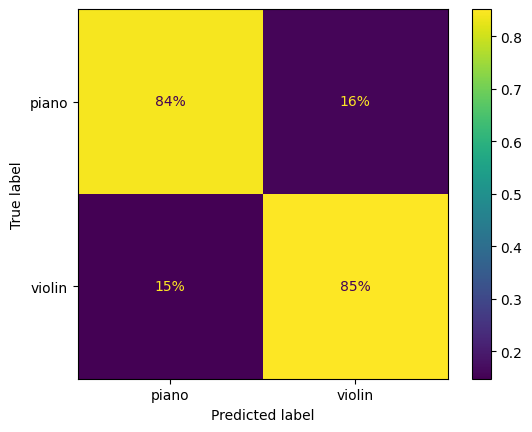

In [64]:
y_train_pred_cnn = cross_val_predict(final_model_cnn, X_train_img, y_train, cv=5, verbose=0)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_cnn, normalize="true", values_format=".0%", display_labels=display_labels)
plt.show()

In [65]:
# test

In [66]:
cv_score_cnn_test = cross_val_score(final_model_cnn, X_test_img, y_test, cv=5, scoring="accuracy", verbose=0)
cv_score_cnn_test

Epoch 1/20
7/7 [==============================] - 2s 117ms/step - loss: 0.9594 - accuracy: 0.7356
Epoch 2/20
7/7 [==============================] - 0s 36ms/step - loss: 0.4601 - accuracy: 0.8413
Epoch 3/20
7/7 [==============================] - 0s 24ms/step - loss: 0.2645 - accuracy: 0.8894
Epoch 4/20
7/7 [==============================] - 0s 31ms/step - loss: 0.2970 - accuracy: 0.8846
Epoch 5/20
7/7 [==============================] - 0s 28ms/step - loss: 0.1330 - accuracy: 0.9423
Epoch 6/20
7/7 [==============================] - 0s 26ms/step - loss: 0.1100 - accuracy: 0.9615
Epoch 7/20
7/7 [==============================] - 0s 27ms/step - loss: 0.1341 - accuracy: 0.9423
Epoch 8/20
7/7 [==============================] - 0s 30ms/step - loss: 0.1218 - accuracy: 0.9423
Epoch 9/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0508 - accuracy: 0.9808
Epoch 10/20
7/7 [==============================] - 0s 25ms/step - loss: 0.0703 - accuracy: 0.9808
Epoch 11/20
7/7 [===========

array([0.8490566 , 0.84615385, 0.78846154, 0.67307692, 0.84615385])

In [67]:
print('Accuracy CNN Test:', cv_score_cnn_test.mean())

Accuracy CNN Test: 0.8005805515239477


Epoch 1/20
7/7 [==============================] - 2s 112ms/step - loss: 0.8951 - accuracy: 0.7356
Epoch 2/20
7/7 [==============================] - 0s 48ms/step - loss: 0.6375 - accuracy: 0.8317
Epoch 3/20
7/7 [==============================] - 0s 34ms/step - loss: 0.3808 - accuracy: 0.8558
Epoch 4/20
7/7 [==============================] - 0s 24ms/step - loss: 0.1823 - accuracy: 0.9279
Epoch 5/20
7/7 [==============================] - 0s 28ms/step - loss: 0.2048 - accuracy: 0.9231
Epoch 6/20
7/7 [==============================] - 0s 23ms/step - loss: 0.0863 - accuracy: 0.9760
Epoch 7/20
7/7 [==============================] - 0s 23ms/step - loss: 0.1244 - accuracy: 0.9615
Epoch 8/20
7/7 [==============================] - 0s 29ms/step - loss: 0.1481 - accuracy: 0.9471
Epoch 9/20
7/7 [==============================] - 0s 24ms/step - loss: 0.0688 - accuracy: 0.9663
Epoch 10/20
7/7 [==============================] - 0s 23ms/step - loss: 0.0884 - accuracy: 0.9663
Epoch 11/20
7/7 [===========

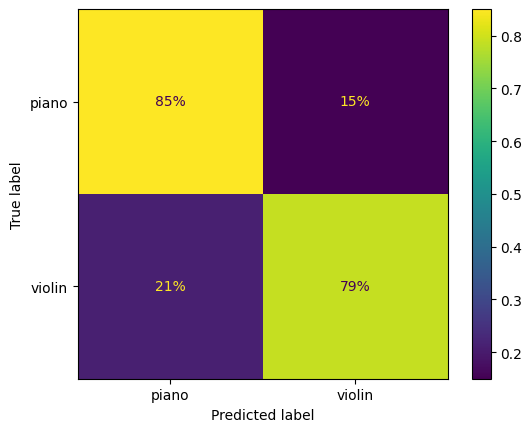

In [68]:
y_test_pred_cnn = cross_val_predict(final_model_cnn, X_test_img, y_test, cv=5, verbose=0)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_cnn, normalize="true", values_format=".0%", display_labels=display_labels)
plt.show()

In [69]:
model_name = 'CNN'
average = 'macro'
print(f'Accuracy {model_name}:', accuracy_score(y_test, y_test_pred_cnn))
print(f'Precision {model_name}:', precision_score(y_test, y_test_pred_cnn, average=average))
print(f'F1 score {model_name}:', f1_score(y_test, y_test_pred_cnn, average=average))
print(f'Recall score {model_name}:', recall_score(y_test, y_test_pred_cnn, average=average))

Accuracy CNN: 0.8237547892720306
Precision CNN: 0.8212488015340365
F1 score CNN: 0.8205273857928725
Recall score CNN: 0.8199069101324741


In [71]:
re = classification_report(y_test, y_test_pred_cnn, target_names=display_labels)

print(re)

              precision    recall  f1-score   support

       piano       0.84      0.85      0.84       147
      violin       0.80      0.79      0.80       114

    accuracy                           0.82       261
   macro avg       0.82      0.82      0.82       261
weighted avg       0.82      0.82      0.82       261

